# **CLASSIFICATION OF SMS AS SPAM OR LEGITIMATE**

> ## **ELOMUNAIT JOHN OMODING**


# **Build an AI model that can classify SMS messages as spam or legitimate.**

Using the TF-IDF technique with classifiers like Naive Bayes, Logistic Regression, or Support Vector Machines to identify spam messages.


## Import required libraries and dataset

The original dataset can be found [here](https://archive.ics.uci.edu/dataset/228/sms+spam+collection).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.utils import shuffle
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Downloading of data
Download the zipped dataset folder using the link.
Unzip the the dataset and observe how it is shaped.

In [2]:
!wget https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip

--2024-02-17 18:33:17--  https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘sms+spam+collection.zip’

sms+spam+collection     [ <=>                ] 198.65K  --.-KB/s    in 0.08s   

2024-02-17 18:33:17 (2.40 MB/s) - ‘sms+spam+collection.zip’ saved [203415]



In [3]:
# Unzip the downloaded file
!unzip sms+spam+collection.zip

Archive:  sms+spam+collection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


### Reading the text file into a Pandas DataFrame.

In [20]:
file_path = '/content/SMSSpamCollection'

# Read the text file into a Pandas DataFrame
sms = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'text'])

# Display the DataFrame
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Data Analysis

In [21]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [22]:
sms.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [23]:
sms.isnull().sum()

label    0
text     0
dtype: int64

### Shuffling the data

In [24]:
sms = shuffle(sms, random_state=22)
sms.T

,3194,5064,2494,1015,1272,2136,3985,3830,4207,494,...,3629,764,989,2527,2952,4587,5478,356,4908,2933
label,ham,ham,ham,ham,ham,ham,ham,ham,ham,ham,...,ham,ham,ham,ham,ham,spam,ham,ham,ham,ham
text,I will lick up every drop :) are you ready to ...,Ok i also wan 2 watch e 9 pm show...,they released another Italian one today and it...,"Ya, told..she was asking wats matter?",If you still havent collected the dough pls le...,"Carlos took a while (again), we leave in a minute","Hey, I missed you tm of last night as my phone...","Sure, I'll see if I can come by in a bit","Get the door, I'm here",What class of &lt;#&gt; reunion?,...,Meeting u is my work. . . Tel me when shall i ...,Nothing but we jus tot u would ask cos u ba gu...,Yun ah.the ubi one say if ü wan call by tomorr...,Do u noe how 2 send files between 2 computers?,Hey now am free you can call me.,"Mila, age23, blonde, new in UK. I look sex wit...",No probably &lt;#&gt; %.,Thank You for calling.Forgot to say Happy Onam...,Then anything special?,Only 2% students solved this CAT question in '...


In [25]:
sms['label'] = sms['label'].map({'ham':0,'spam':1})
sms['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

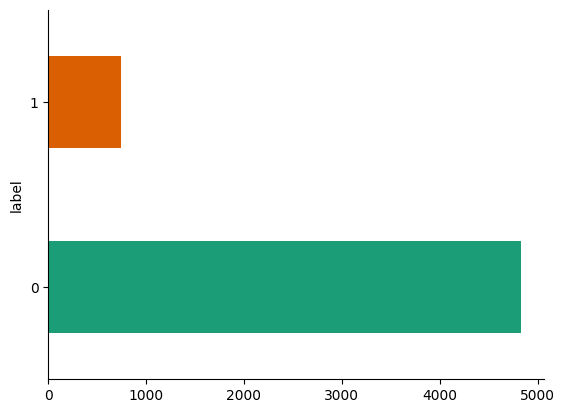

In [26]:
sms.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Splitting the dataframe into train set and test set.

In [27]:
# Assuming you have a DataFrame 'df' with 'label' and 'text' columns
X_train, X_test, y_train, y_test = train_test_split(sms['text'], sms['label'], test_size=0.2, random_state=42)

In [28]:
# CountVectorizer
vectorizer = CountVectorizer()
X_tfidf2 = vectorizer.fit_transform(sms['text']).toarray()
X_tfidf2 = pd.DataFrame(X_tfidf2, columns=vectorizer.get_feature_names_out())  # Use get_feature_names_out

print(X_tfidf2.shape)

(5572, 8713)


In [29]:
# TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=8000, stop_words='english', lowercase=True)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [30]:
print(X_test_tfidf.shape)

(1115, 7468)


### Using the Multinomial Naive Bayes classifier to train the model.

In [31]:
# Classification Model
# Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

### Testing the model on unseen test data.

In [32]:
# Test model
predictions = clf.predict(X_test_tfidf)
print('predicted', predictions)

predicted [0 0 1 ... 0 0 0]


### Evaluation of the model.

In [33]:
# Assuming you have y_test and predictions
# Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.967713004484305

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       953
           1       1.00      0.78      0.88       162

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



### Improving the model using the best parameters.

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Create the GridSearchCV object
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Use the best hyperparameters to train the final model
final_model = MultinomialNB(alpha=best_alpha)
final_model.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=0.1)

In [35]:
predictions2 = final_model.predict(X_test_tfidf)
# Evaluation
print("Accuracy:", accuracy_score(y_test, predictions2))
print("\nClassification Report:\n", classification_report(y_test, predictions2))

Accuracy: 0.9838565022421525

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       953
           1       0.96      0.93      0.94       162

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have y_test and predictions
conf_matrix = confusion_matrix(y_test, predictions2)

# Extract individual values
TP = conf_matrix[1, 1]  # True Positive
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]  # False Negative

print(f'True Positives: {TP}')
print(f'True Negatives: {TN}')
print(f'False Positives: {FP}')
print(f'False Negatives: {FN}')


True Positives: 150
True Negatives: 947
False Positives: 6
False Negatives: 12


### Using the ROC-AUC Curve, Precision-Recall Curve and Confusion Matrix to observe how well the model can predict.


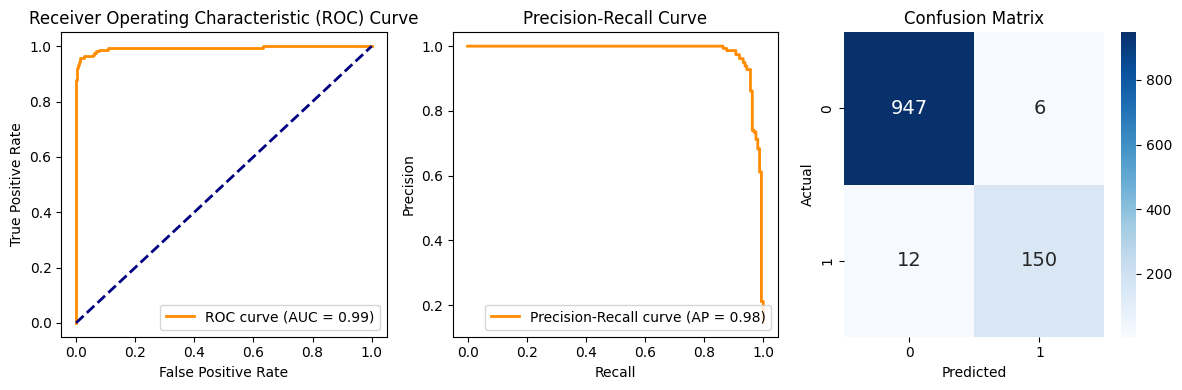

In [39]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, classification_report

def plot_evaluation_curves(model, X, y_true):
    # ROC-AUC Curve
    y_scores = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Precision-Recall Curve
    precision, recall, thresholds_pr = precision_recall_curve(y_true, y_scores)
    average_precision = average_precision_score(y_true, y_scores)

    plt.subplot(1, 3, 2)
    plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower right')

    # Confusion Matrix
    y_pred = model.predict(X)
    conf_matrix = confusion_matrix(y_true, y_pred)
    # conf_matrix = confusion_matrix(y_valid, y_pred_valid)
    plt.subplot(1, 3, 3)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

# Usage
plot_evaluation_curves(final_model, X_test_tfidf, y_test)